<a href="https://colab.research.google.com/github/Subhranshu-123/BIKE2/blob/main/Copy_of_MLP_from_Scratch_SUBHRANSHU_SEKHAR_PANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A neural network is a system designed to learn patterns in data by adjusting its internal parameters. It consists of layers of interconnected nodes (neurons) that transform data as it moves through the network, enabling it to model complex relationships.

Key components, which we cover through this lab, include:

- **Architecture:** The structure of the network, including the number of layers and neurons. These structural choices, often controlled by hyperparameters, define how the network processes and represents data.
- **Loss Function:** A mathematical expression that measures the error in the network’s predictions, guiding the training process to minimize this error.
- **Learning Process:** An iterative adjustment of the network’s parameters to improve its predictions. Hyperparameters play a key role in shaping how effectively this process works.

Neural networks are highly versatile tools, capable of uncovering hierarchical patterns in data and solving a wide range of problems.


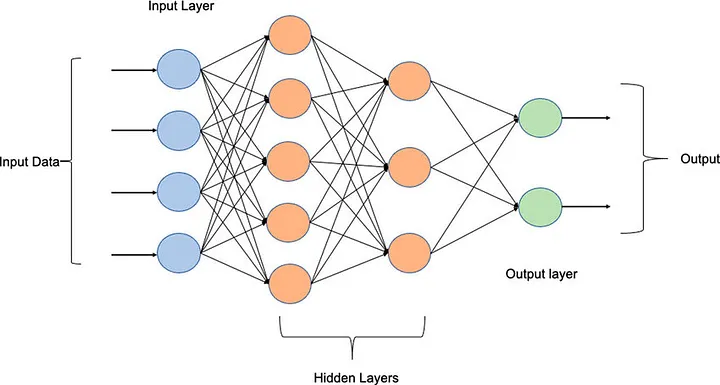

## **1. Model Architecture Overview**

The **architecture** of a neural network refers to its structural design—how layers and neurons are arranged and connected. This is a crucial factor in determining the model’s ability to represent data and solve specific problems. Key aspects of architecture include:
- **Layer Arrangement:** How layers are stacked (e.g., deep vs. shallow networks) and the relationships between them (e.g., feedforward vs. recurrent).  
- **Neuron Distribution:** The number of neurons per layer and how it varies across layers. This distribution influences how the model handles complexity and abstraction.  
- **Connections Between Layers:** The way neurons in one layer connect to neurons in another (e.g., fully connected, convolutional layers).


Different **architectural shapes** serve specific tasks and problem domains. For example:
- **Symmetric architectures** (e.g., hourglass-shaped):  
  - Typically have a narrowing middle (bottleneck) for efficient feature compression, followed by expansion to reconstruct or refine data.  
  - Common applications include image segmentation and pose estimation.

- **Hierarchical architectures** (e.g., pyramid-shaped):  
  - Use progressively smaller layers, capturing multi-scale features.  
  - Well-suited for tasks like object detection or image classification, where details need to be processed at different scales.

- **Uniform architectures** (e.g., cylinder-shaped):  
  - Maintain the same number of neurons across layers.  
  - Simpler design often used for sequential or time-dependent data, where the input-output relationship is less complex.


**Why Architecture Matters:**  
The choice of architecture affects a network’s capacity to model complexity and its computational efficiency. Understanding the relationship between architecture and performance is crucial for designing networks that solve specific tasks effectively.


## **2. Measuring Error: Loss Functions in Neural Networks**


Loss functions are critical for training neural networks, as they quantify the discrepancy between the model’s predictions and the true target values. By minimizing the loss, the network learns to improve its predictions over time. In this lab, we focus on classification tasks, using **Cross-Entropy Loss** as the primary metric. However, other loss functions, such as **Mean Squared Error**, are commonly used for different types of tasks.




#### **What is a Loss Function?**
A loss function computes a scalar value that reflects the error between the predicted output $(\hat{y})$ and the true target $(y)$. This scalar drives the optimization process, guiding adjustments to the network’s weights and biases.



#### **Key Loss Functions**

1. **Mean Squared Error (MSE):**  
   Commonly used for regression tasks, MSE calculates the average squared difference between predicted values and true values:
   $$
   \text{MSE}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{k} \sum_{i=1}^k (\hat{y}_i - y_i)^2
   $$
   - **$\hat{y}_i$:** Predicted value for the $i$-th output.  
   - **$y_i$:** True value for the $i$-th output.  
   - **$k$:** Number of outputs.  
   MSE penalizes larger errors more heavily, making it ideal for continuous-value predictions, such as predicting temperatures or stock prices.

2. **Cross-Entropy Loss (CE):**  
   Used for classification tasks, Cross-Entropy Loss measures the dissimilarity between the predicted probability distribution $(\hat{y})$ and the true distribution $(y)$ over $k$ classes:
   $$
   \text{CE}(\hat{\mathbf{y}}, \mathbf{y}) = - \sum_{i=1}^k y_i \log(\hat{y}_i)
   $$
   - **$\hat{y}_i$:** Predicted probability for the $i$-th class.  
   - **$y_i$:** Binary indicator (1 for the correct class, 0 otherwise).  
   Cross-entropy encourages the model to assign higher probabilities to the correct class while penalizing incorrect predictions.




Understanding loss functions is critical because they provide the feedback necessary to evaluate model performance. For this lab’s classification task, we will use **Cross-Entropy Loss**, but it’s important to recognize the broader utility of loss functions like **MSE** for other applications.


## **3. Hyperparameters Overview**


Hyperparameters are tunable settings that control training. Some of the below hyperparameters are typically fixed as part of the model's design, but can be experimented with during model tuning or ablation studies. They include:
- **Learning Rate:** Controls the size of weight updates during training.
- **Batch Size:** Number of samples used to compute gradients.
- **Activation Functions:** Introduce non-linearity (e.g., ReLU, sigmoid).
- **Number of Epochs:** Determines how many passes the model makes through the training data.
- **Optimizer:** Determines how the model updates its weights during training (e.g., SGD, Adam).
- **Architecture - Number of Hidden Layers and Neurons per Hidden Layer:** Shapes the model architecture by defining its depth and width, controlling the model's ability to learn patterns and generalize.



### **Learning Rate: The Speed of Learning**


The learning rate $(\eta)$ determines how large the steps are during training as the model updates its weights to minimize error.
It directly impacts how quickly the model converges to a solution. Think of it as the speed of a car: too slow, and you’ll take forever
to reach your destination; too fast, and you might miss the turn entirely.


#### **Mathematical Context**

The learning rate is a scaling factor in the weight update rule during gradient descent:

$$
w^{t+1} = w^t - \eta \frac{\partial L}{\partial w}
$$

Where:
- $w^t$: Weights at step $t$.  
- $\eta$: Learning rate.  
- $\frac{\partial L}{\partial w}$: Gradient of the loss function $L$ with respect to the weights.

The learning rate affects how large the updates to the weights are:
- **Low learning rate:** Small, precise steps toward minimizing the loss.  
- **High learning rate:** Large steps that may overshoot the optimal value, leading to instability.


#### **Range of Values and Trade-offs**

| Learning Rate     | Effect                             | Pros                   | Cons                             |
|-------------------|------------------------------------|------------------------|----------------------------------|
| **Low (e.g., 0.001)** | Slow, stable convergence          | Reduces instability    | Requires more epochs            |
| **Optimal (e.g., 0.01)** | Fast and efficient learning      | Balances speed & stability | Requires careful tuning         |
| **High (e.g., 0.1)** | Fast, unstable updates            | Accelerates early progress | Risks divergence or oscillation |


#### **Visualizing Its Effect**


When training with different learning rates:
- **Low Learning Rate:** Loss decreases steadily but requires many epochs to converge.  
- **Optimal Learning Rate:** Loss decreases quickly and stabilizes efficiently.  
- **High Learning Rate:** Loss may oscillate or even diverge.


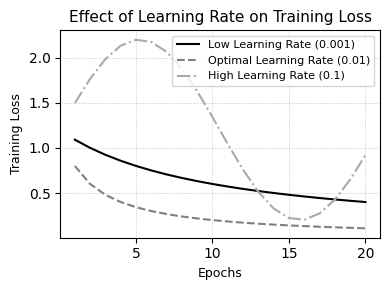

### **Batch Size: The Size of Each Learning Step**  



The batch size determines how many training samples the model processes before updating its weights. It’s a crucial hyperparameter that influences the trade-off between training speed and generalization. Think of batch size as the number of ingredients you prepare at a time when cooking: working with small batches gives you more control, but large batches are faster.



#### **Mathematical Context**  
During training, the model computes the gradient of the loss function over a batch of data. For a batch size $m$, the gradient is:

$$
\frac{\partial L}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L_i}{\partial w}
$$

Where:
- $m$: The batch size.  
- $L_i$: Loss for the $i$-th sample in the batch.

A larger batch size results in smoother, more stable gradients, while a smaller batch size introduces more noise.



#### **Range of Values and Trade-offs**
| Batch Size         | Effect                                     | Pros                     | Cons                              |
|--------------------|-------------------------------------------|--------------------------|-----------------------------------|
| **Small (e.g., 8)**   | Noisy gradients, better generalization    | Requires less memory      | Slower training                   |
| **Moderate (e.g., 32)**| Balanced trade-off between noise and stability | Good generalization      | Longer epochs than large batches  |
| **Large (e.g., 128)**  | Smooth gradients, faster convergence    | Efficient for large datasets | Risks overfitting or poor generalization |




#### **Visualizing Its Effect**  
Imagine plotting the loss curves for models trained with different batch sizes:
- **Small Batch Size:** Loss fluctuates but converges to a better generalization performance.  
- **Large Batch Size:** Loss decreases smoothly but may lead to overfitting if the dataset is small.  



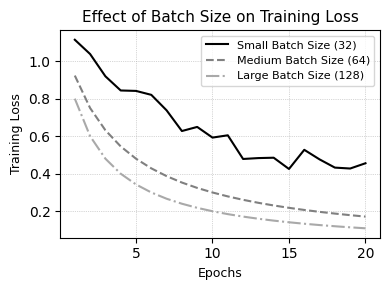

### **Activation Functions: Adding Non-Linearity to Learning**  


Activation functions are essential in neural networks because they introduce non-linearity. Without them, a neural network would essentially become a linear model, no matter how many layers it has. Activation functions enable the network to learn complex patterns and relationships in the data.

Think of activation functions as "decision gates" that decide how much of the input signal passes through to the next layer.



#### **Mathematical Context**  
Each neuron in a neural network computes a weighted sum of its inputs:

$$
z = w \cdot x + b
$$

The activation function $f(z)$ then determines the output:

$$
a = f(z)
$$

Different activation functions have unique properties that affect how the network learns and processes information.



#### **Common Activation Functions and Their Properties**

| **Function**  | **Formula**                          | **Pros**                                | **Cons**                               |
|---------------|--------------------------------------|-----------------------------------------|----------------------------------------|
| **ReLU**      | $f(z) = \max(0, z)$               | Efficient, avoids vanishing gradients   | Can lead to "dead neurons"             |
| **Sigmoid**   | $f(z) = \frac{1}{1 + e^{-z}}$      | Smooth, interpretable output            | Vanishing gradients, slow convergence  |
| **Tanh**      | $f(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$ | Scales output between \(-1\) and \(1\)  | Still prone to vanishing gradients     |
| **Softmax**   | $f(z)_i = \frac{e^{z_i}}{\sum_j e^{z_j}}$ | Converts scores into probabilities      | Only used in the output layer          |



#### **Why Activation Functions Matter**
1. **ReLU (Rectified Linear Unit):**  
   - Most commonly used activation function in hidden layers.  
   - Efficient to compute and avoids the vanishing gradient problem seen with sigmoid and tanh.  
   - **Challenge:** Can produce "dead neurons" when $z \leq 0$, as the gradient becomes zero.

2. **Sigmoid and Tanh:**  
   - Useful for tasks requiring bounded outputs (e.g., probabilities for sigmoid).  
   - **Challenge:** Gradients diminish as $z$ moves toward extreme values, slowing learning.

3. **Softmax:**  
   - Converts raw scores into probabilities for multi-class classification problems.  
   - Typically used in the output layer for classification tasks.



#### **Visualizing Activation Functions**  
Here are commonly used activation functions to highlight their differences. This plot demonstrates how each function transforms the input $z$ into the output $a$:



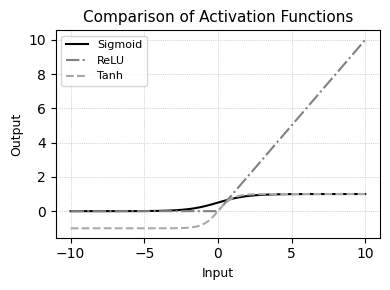

### **Number of Epochs: How Long Should the Model Learn?**  


The number of epochs determines how many times the entire training dataset is passed through the model during training. It’s like practicing a skill—more practice can lead to mastery, but overdoing it might cause burnout or overfitting.


#### **What Happens During an Epoch?**  
During one epoch, the model:
1. Processes the entire training dataset, divided into batches.  
2. Updates its weights using gradient descent for each batch.

The number of epochs determines how many times this process is repeated. A higher number of epochs allows the model to learn more, but it increases the risk of overfitting (performing well on the training data but poorly on unseen data).




#### **Range of Values and Trade-offs**
| **Epochs**       | **Effect**                            | **Pros**                          | **Cons**                          |
|-------------------|---------------------------------------|------------------------------------|-----------------------------------|
| **Low (e.g., 5)** | Limited learning; underfitting risk   | Faster training                   | May not capture data patterns     |
| **Optimal (e.g., 20-50)** | Balanced learning; generalizes well | Good trade-off between speed & accuracy | Requires careful tuning           |
| **High (e.g., 100+)** | Risk of overfitting                | Maximizes accuracy on training data | May lead to poor generalization   |



#### **Visualizing Its Effect**  
Imagine you train a model for different numbers of epochs:
- **Too Few Epochs:** The model underfits, as it hasn’t learned enough patterns from the data. Validation loss decreases slightly or stays high.  
- **Optimal Number of Epochs:** Training loss decreases steadily, and validation loss stabilizes, indicating good generalization.  
- **Too Many Epochs:** Validation loss increases after a certain point, while training loss keeps decreasing, showing overfitting.



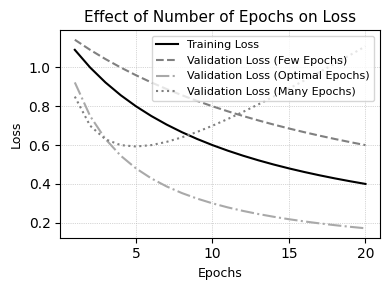

### **Optimizer: The Strategy for Learning**  


An optimizer determines how the model updates its weights during training to minimize the loss function. It defines the algorithm that drives gradient descent, making it one of the most crucial choices for training neural networks effectively.




#### **Mathematical Context**  
The optimizer updates weights based on the gradient of the loss function. The general weight update rule is:

$$
w^{t+1} = w^t - \eta \cdot \nabla L(w^t)
$$

Where:
- $w^t$: Weights at step $t$.  
- $\eta$: Learning rate.  
- $\nabla L(w^t)$: Gradient of the loss function at $w^t$.

Different optimizers modify this basic formula to improve performance. For example:

1. **Stochastic Gradient Descent (SGD):**  
   $$
   w^{t+1} = w^t - \eta \cdot \nabla L(w^t)
   $$
   - Simple and efficient but may converge slowly.

2. **Adam (Adaptive Moment Estimation):**  
   $$
   m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla L(w^t)
   $$
   $$
   v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla L(w^t))^2
   $$
   $$
   \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
   $$
   $$
   w^{t+1} = w^t - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
   $$
   - Combines momentum and adaptive learning rates for faster, more stable convergence.



#### **Range of Choices and Trade-offs**
| Optimizer  | Behavior                                    | Pros                              | Cons                              |
|------------|--------------------------------------------|-----------------------------------|-----------------------------------|
| **SGD**    | Simple gradient-based updates              | Easy to implement, computationally efficient | May converge slowly, sensitive to learning rate. |
| **Momentum** | Adds momentum to SGD to smooth updates    | Reduces oscillations, accelerates convergence | Requires tuning of momentum parameter. |
| **Adam**   | Combines momentum and adaptive learning rates | Fast convergence, good default for many tasks | May generalize poorly if not tuned. |
| **RMSprop** | Scales learning rate based on gradient magnitude | Handles noisy updates well       | May not perform well on all tasks. |



#### **Visualizing Its Effect**  
Imagine optimizing a loss function shaped like a bowl. Each optimizer takes a different path to reach the bottom:
- **SGD:** Takes steady, small steps, which may oscillate near the solution.  
- **Momentum:** Smooths oscillations by combining past gradients with the current one.  
- **Adam:** Adjusts step sizes adaptively, accelerating learning in some regions while slowing down in others.



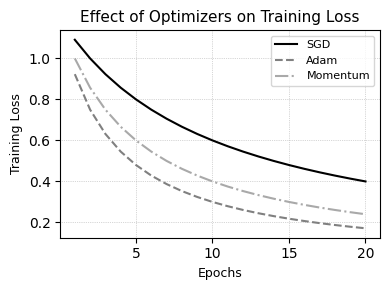

### **Architecture - Number of Hidden Layers and Neurons per Hidden Layer**



The **number of hidden layers** determines the **depth** of a neural network, while the **number of neurons per hidden layer** defines its **width**. Together, they shape the architecture and control the model’s ability to learn patterns and generalize. These two hyperparameters must be balanced to align with the task requirements and the chosen architecture.



#### **Why Do They Matter?**
1. **Depth:**  
   - More layers increase the model's ability to capture hierarchical features but can lead to overfitting or higher computational costs.  
   - Fewer layers result in simpler models that might underfit complex data.  
   - Depth is essential for defining architectural shapes like hourglass, pyramid, and cone.

2. **Width:**  
   - More neurons per layer increase the model’s capacity to represent features.  
   - Fewer neurons result in a simpler model but may miss fine-grained patterns.  
   - Width affects architectural shapes like the tapering of a pyramid or the bottleneck of an hourglass.




#### **How They Relate to Shapes**

| **Common Shapes**            | **Depth (Layers)** | **Example Width (Neurons per Layer)**          | **Common Use Cases**                                                                                     | **Examples**                                                                                     |
|-----------------------|--------------------|-----------------------------------------|----------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| **Hourglass**         | 3-5+                | 128 → 64 → 32 → 64 → 128               | Symmetric tasks, encoder-decoder pipelines, feature refinement                                           | U-Net, VAEs, GAN discriminators, DensePose                                                     |
| **Pyramid**           | 4-8+                | 256 → 128 → 64 → 32                    | Hierarchical feature extraction, dimensionality reduction                                                | CNNs, ResNet (early layers), Vision Transformers (preprocessing)                               |
| **Inverted Pyramid**  | 4-8+                | 32 → 64 → 128 → 256                    | Expanding representations, synthesis, reconstruction tasks                                              | GAN generators, VAE decoders, PixelCNNs                                                       |
| **Cone**              | 4-8+                | 256 → 192 → 128 → 96 → 64              | Progressive generative refinement, smooth transitions                                                   | GAN generators, Progressive GANs                                                               |
| **Cylinder**          | 2-6+                | 128 → 128 → 128 → 128                  | Sequential or temporal patterns, simple-to-moderate complexity                                          | RNNs, LSTMs, GRUs, Transformer encoders                                                       |



## **4. How Backpropagation Works**

Backpropagation is the process that allows a neural network to learn by calculating and propagating gradients through the network. Each hyperparameter listed below influences different parts of this process, shaping the efficiency and outcome of training.



#### **1. Forward Propagation**
- **What Happens:**  
  - The input data ($x \in \mathbb{R}^n$) is passed through the network layer by layer to produce a prediction ($\hat{y}$).
  - Each layer computes:  
    $$
    z_i = W_i \cdot a_{i-1} + b_i, \quad a_i = f_i(z_i)
    $$  
    - $z_i$: Weighted sum of inputs at layer $i$.  
    - $a_i$: Output after applying the activation function $f_i(z_i)$.  
    
- **Hyperparameters Involved:**  
  - Activation Functions
  - Number of Hidden Layers and Neurons per Hidden Layer


#### **2. Loss Calculation**
- **What Happens:**  
  - The loss function quantifies the error between the predicted output ($\hat{y}$) and the true target ($y$):  
    $$
    L = \text{Loss}(y, \hat{y})
    $$  
  - Examples:
    - **Cross-Entropy Loss** (classification tasks):  
      $$
      L = -\sum_{i=1}^k y_i \log(\hat{y}_i)
      $$  
    - **Mean Squared Error (MSE)** (regression tasks):  
      $$
      L = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
      $$  




#### **3. Gradient Computation**
- **What Happens:**  
  - Gradients of the loss function are computed with respect to each parameter (weights $W_i$ and biases $b_i$) by applying the chain rule:
$$
\frac{\partial L}{\partial z_i} = \frac{\partial L}{\partial a_i} \cdot f_i'(z_i)
$$
  - For hidden layers:
$$
\frac{\partial L}{\partial z_i} = \left(\frac{\partial L}{\partial z_{i+1}} \cdot W_{i+1}^\top\right) \cdot f_i'(z_i)
$$  

- **Hyperparameters Involved:**  
  - Batch Size


#### **4. Weight and Bias Updates**
- **What Happens:**  
  - Using the gradients, weights and biases are updated to reduce the loss:  
$$
W_i^{t+1} = W_i^t - \eta \cdot \frac{\partial L}{\partial W_i}, \quad b_i^{t+1} = b_i^t - \eta \cdot \frac{\partial L}{\partial b_i}
$$  
    - $\eta$: Learning rate that controls the size of the updates.

- **Hyperparameters Involved:**  
  - Learning Rate
  - Optimizer


#### **5. Iterative Process**
- **What Happens:**  
  - Steps 1–4 are repeated for each batch across all epochs.  
  - The network gradually converges as backpropagation iteratively adjusts parameters.

- **Hyperparameters Involved:**  
  - Number of Epochs

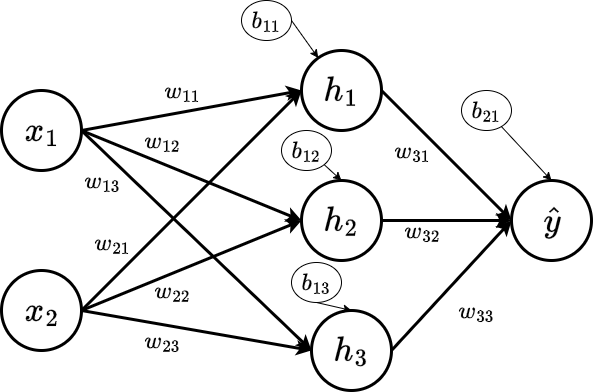

In [ ]:
import numpy as np

np.set_printoptions(precision=5, suppress=True)

def tanh(z):
    return np.tanh(z)

def dtanh(z):
    return 1 - np.tanh(z)**2

# === Initialize a simple 2-3-1 MLP ===
W1 = np.array([[ 0.10, -0.20],
               [ 0.40,  0.30],
               [-0.50,  0.20]], dtype=float)   # (3,2)
b1 = np.zeros((3,1))                           # (3,1)
W2 = np.array([[ 0.20, -0.10, 0.30]], dtype=float) # (1,3)
b2 = np.zeros((1,1))                           # (1,1)

# One training example (regression)
x = np.array([[1.0],[0.0]])
y = np.array([[1.0]])

lr = 0.1

print("=== Initial Parameters ===")
print("W1:\n", W1)
print("b1:\n", b1.T)
print("W2:\n", W2)
print("b2:\n", b2, "\n")

# ---------- Forward pass ----------
z1 = W1 @ x + b1 # W11.x1 + w21.x2+b11 , w12.x1+w22.x2+b12, w13.x1+w23.x2+b13
a1 = tanh(z1)
z2 = W2 @ a1 + b2
yhat = z2
loss = 1 * np.sum((yhat - y)**2)

print("=== Forward pass ===")
print("x:", x.T)
print("z1:", z1.T)
print("a1:", a1.T)
print("z2:", z2)
print("yhat:", yhat)
print("loss:", float(loss), "\n")



=== Initial Parameters ===
W1:
 [[ 0.1 -0.2]
 [ 0.4  0.3]
 [-0.5  0.2]]
b1:
 [[0. 0. 0.]]
W2:
 [[ 0.2 -0.1  0.3]]
b2:
 [[0.]] 

=== Forward pass ===
x: [[1. 0.]]
z1: [[ 0.1  0.4 -0.5]]
a1: [[ 0.09967  0.37995 -0.46212]]
z2: [[-0.1567]]
yhat: [[-0.1567]]
loss: 1.3379466646692826 



Nice — here’s the full, expanded chain-rule derivation for $\dfrac{\partial L}{\partial w^{[1]}_{11}}$ (the weight from input $x_1$ to hidden unit $h_1$), written step-by-step and then generalized.

### Setup / notation

* Hidden pre-activation: $z^{[1]}_1 = w^{[1]}_{11} x_1 + w^{[1]}_{12} x_2 + b^{[1]}_1$.
* Hidden activation (tanh): $h_1 = \tanh(z^{[1]}_1)$.
* Output (linear): $\hat y = w_{31}h_1 + w_{32}h_2 + w_{33}h_3 + b^{[2]}$.
* Loss (MSE): $L=\tfrac{1}{2}(\hat y-y)^2$.

### Chain rule decomposition

We want $\dfrac{\partial L}{\partial w^{[1]}_{11}}$. Expand the dependency path:

$$
\frac{\partial L}{\partial w_{11}}
= \frac{\partial L}{\partial \hat y}
\cdot \frac{\partial \hat y}{\partial h_1}
\cdot \frac{\partial h_1}{\partial z_1}
\cdot \frac{\partial z_1}{\partial w_{11}}.
$$

Now compute each factor.

1. Output error (MSE):

$$
\frac{\partial L}{\partial \hat y} \;=\; \hat y - y.
$$

2. Output w\.r.t. hidden activation:

$$
\frac{\partial \hat y}{\partial h_1} \;=\; w_{31}.
$$

3. tanh derivative:

$$
\frac{\partial h_1}{\partial z^{[1]}_1} \;=\; 1 - \tanh^2(z^{[1]}_1)
\;=\; 1 - h_1^2.
$$

4. pre-activation w\.r.t. the weight:

$$
\frac{\partial z^{[1]}_1}{\partial w^{[1]}_{11}} \;=\; x_1.
$$

### Multiply them

$$
\boxed{\;
\frac{\partial L}{\partial w^{[1]}_{11}}
\;=\; (\hat y - y)\, w_{31}\, (1 - h_1^2)\, x_1
\; }
$$

### Comments / generalization

* For the weight from input $x_k$ to hidden unit $j$ (i.e. $w^{[1]}_{j k}$):

$$
\frac{\partial L}{\partial w^{[1]}_{j k}}
= (\hat y - y)\, w_{3j}\, (1 - h_j^2)\, x_k.
$$

* For hidden bias $b^{[1]}_j$:

$$
\frac{\partial L}{\partial b^{[1]}_j}
= (\hat y - y)\, w_{3j}\, (1 - h_j^2).
$$

* This is exactly the elementwise version of $\delta^{[1]} = (W^{[2]})^\top (\hat y - y) \odot (1-h^2)$ and $\dfrac{\partial L}{\partial W^{[1]}} = \delta^{[1]} x^\top$.

Want me to expand this into explicit formulas for all six first-layer weights ($w^{[1]}_{11},w^{[1]}_{12},w^{[1]}_{21},\dots$) written out?




* let $z_1$ be the pre-activation (the summation into the unit),
* let $a_1(\cdot)$ be the activation function so $h_1 = a_1(z_1)$,
* output $\hat y = w_{31}h_1 + w_{32}h_2 + w_{33}h_3 + b^{[2]}$,
* loss $L=\tfrac12(\hat y-y)^2$ (MSE) for concreteness.

### 1) $\displaystyle \frac{\partial L}{\partial h_1}$ — error arriving at the hidden activation

Chain only through the output (since output is linear):

$$
\frac{\partial L}{\partial h_1}
= \frac{\partial L}{\partial \hat y}\cdot\frac{\partial \hat y}{\partial h_1}
= (\hat y - y)\cdot w_{31}.
$$

(If you use a different loss, replace $\partial L/\partial\hat y$ accordingly; here $\partial L/\partial\hat y=\hat y-y$.)

### 2) $\displaystyle \frac{\partial L}{\partial z_1}$ — backprop through the activation

Apply chain rule through $h_1 = a_1(z_1)$:

$$
\frac{\partial L}{\partial z_1}
= \frac{\partial L}{\partial h_1}\cdot \frac{d\,a_1(z_1)}{dz_1}
= (\hat y - y)\, w_{31}\, a_1'(z_1).
$$

### 3) $\displaystyle \frac{\partial L}{\partial w^{[1]}_{11}}$ — weight from $x_1$ to hidden unit 1

Since $z_1 = w^{[1]}_{11}x_1 + w^{[1]}_{12}x_2 + b^{[1]}_1$,

$$
\frac{\partial z_1}{\partial w^{[1]}_{11}} = x_1,
$$

so

$$
\boxed{\;\frac{\partial L}{\partial w_{11}}
= \frac{\partial L}{\partial z_1}\cdot x_1
= (\hat y - y)\, w_{31}\, a_1'(z_1)\, x_1\; }.
$$

### Specialize to $a_1=\tanh$

If $a_1(z)=\tanh(z)$ then $a_1'(z)=1-\tanh^2(z)=1-h_1^2$. So

$$
\frac{\partial L}{\partial z_1} = (\hat y - y)\, w_{31}\, (1-h_1^2),
$$

$$
\frac{\partial L}{\partial w^{[1]}_{11}} = (\hat y - y)\, w_{31}\, (1-h_1^2)\, x_1.
$$

---

If you want, I can now (A) write the same three-step chain for $w^{[1]}_{12}$ and the other first-layer weights, or (B) expand the full vector/matrix forms. Which next?




# 1) `dZ2 = (yhat - y)`

**Target derivative:** $\dfrac{\partial L}{\partial \hat y}$

**Loss:** $L = \tfrac12(\hat y - y)^2$ with $\hat y = z^{[2]}$ (linear output).

**Chain rule expansion:**

$$
\frac{\partial L}{\partial \hat y}
= \frac{d}{d\hat y}\left(\tfrac12(\hat y-y)^2\right)
=(\hat y)^2 + 2.\hat y.y+ y^2
= (\hat y-y)
= \hat y - y
$$

**Compact:** $d\hat y = \hat y - y$.



---

# 2) `dW2 = dZ2 @ a1.T`

**Target derivative:** $\dfrac{\partial L}{\partial w_{31}}$ (entire row vector)

**Start from scalar element $W^{[2]}_{1j}$:**

$$
\frac{\partial L}{\partial w_{31}}
= \frac{\partial L}{\partial \hat y} \cdot \frac{\partial \hat y}{\partial w_{31}}
= d\hat y \cdot a^{[1]}_j
$$

**Matrix form:**

$$
\frac{\partial L}{\partial W^{[2]}} = dZ^{[2]}\,(a^{[1]})^\top
$$

(where $dZ^{[2]}$ is scalar or $1\times 1$, and $a^{[1]}$ is $3\times 1$, so result is $1\times 3$).



---

# 3) `db2 = dZ2`

**Target derivative:** $\dfrac{\partial L}{\partial b^{[2]}}$

**Reasoning:** $z^{[2]} = W^{[2]} a^{[1]} + b^{[2]}$.

$$
\frac{\partial L}{\partial b^{[2]}} = \frac{\partial L}{\partial z^{[2]}} \cdot \frac{\partial z^{[2]}}{\partial b^{[2]}} = dZ^{[2]}\cdot 1 = dZ^{[2]}
$$

**Numeric:** $ db^{[2]} \approx -1.1566964445.$

---

# 4) `dA1 = W2.T @ dZ2`

**Target derivative:** $\dfrac{\partial L}{\partial a^{[1]}}$ (vector of length 3)

**Chain rule:** $z^{[2]} = W^{[2]} a^{[1]} + b^{[2]}$, and $L$ depends on $a^{[1]}$ only via $z^{[2]}$. So

$$
\frac{\partial L}{\partial a^{[1]}} = \frac{\partial L}{\partial z^{[2]}} \cdot \frac{\partial z^{[2]}}{\partial a^{[1]}}
= dZ^{[2]} \cdot (W^{[2]})^\top
$$

(so $dA^{[1]} = (W^{[2]})^\top dZ^{[2]}$).

**Matrix form (already):** `dA1 = W2.T @ dZ2`.



---

# 5) `dZ1 = dA1 * dtanh(z1)`

**Target derivative:** $\dfrac{\partial L}{\partial z^{[1]}}$ (vector of length 3)

**Chain rule for each hidden unit $j$:**
$a^{[1]}_j = \tanh(z^{[1]}_j)$. So

$$
\frac{\partial L}{\partial z^{[1]}_j}
= \frac{\partial L}{\partial a^{[1]}_j} \cdot \frac{\partial a^{[1]}_j}{\partial z^{[1]}_j}
= dA^{[1]}_j \cdot (1 - \tanh^2(z^{[1]}_j)).
$$

Vectorized:

$$
dZ^{[1]} = dA^{[1]} \odot (1-\tanh^2(z^{[1]})) = dA^{[1]} \odot \text{dtanh}(z^{[1]}).
$$

**Code:** elementwise multiply `dA1 * dtanh(z1)`.



---

# 6) `dW1 = dZ1 @ x.T`

**Target derivative:** $\dfrac{\partial L}{\partial W^{[1]}}$ (matrix 3×2)

**Elementwise chain rule:** for weight $W^{[1]}_{j,i}$,

$$
\frac{\partial L}{\partial W^{[1]}_{j,i}}
= \frac{\partial L}{\partial z^{[1]}_j}\cdot\frac{\partial z^{[1]}_j}{\partial W^{[1]}_{j,i}}
= dZ^{[1]}_j \cdot x_i.
$$

Vector/matrix form:

$$
\frac{\partial L}{\partial W^{[1]}} = dZ^{[1]}\, x^\top.
$$

**Code:** `dW1 = dZ1 @ x.T` (outer-product style).



---

# 7) `db1 = dZ1`

**Target derivative:** $\dfrac{\partial L}{\partial b^{[1]}}$

**Reasoning:** $ z^{[1]}_j = \sum_i W^{[1]}_{j,i} x_i + b^{[1]}_j \Rightarrow \partial z^{[1]}_j/\partial b^{[1]}_j = 1$. So

$$
\frac{\partial L}{\partial b^{[1]}} = dZ^{[1]}.
$$


In [ ]:
# ---------- Backward pass ----------
dZ2 = (yhat - y)              # derivative wrt linear output
dW2 = dZ2 @ a1.T
db2 = dZ2
dA1 = W2.T @ dZ2
dZ1 = dA1 * dtanh(z1)
dW1 = dZ1 @ x.T
db1 = dZ1

print("=== Backward pass ===")
print("dZ2:", dZ2)
print("dW2:", dW2)
print("db2:", db2)
print("dZ1:", dZ1.T)
print("dW1:", dW1)
print("db1:", db1.T, "\n")

# ---------- Parameter update ----------
W2 -= lr * dW2
b2 -= lr * db2
W1 -= lr * dW1
b1 -= lr * db1

print("=== Updated Parameters ===")
print("W1:\n", W1)
print("b1:\n", b1.T)
print("W2:\n", W2)
print("b2:\n", b2, "\n")

# ---------- Verify new loss ----------
z1_new = W1 @ x + b1
a1_new = tanh(z1_new)
z2_new = W2 @ a1_new + b2
yhat_new = z2_new
loss_new = 0.5 * np.sum((yhat_new - y)**2)

print("=== After update ===")
print("yhat before:", float(yhat))
print("yhat after :", float(yhat_new))
print("loss before:", float(loss))
print("loss after :", float(loss_new), "\n")



=== Backward pass ===
dZ2: [[-1.1567]]
dW2: [[-0.11529 -0.43949  0.53453]]
db2: [[-1.1567]]
dZ1: [[-0.22904  0.09897 -0.2729 ]]
dW1: [[-0.22904  0.     ]
 [ 0.09897  0.     ]
 [-0.2729   0.     ]]
db1: [[-0.22904  0.09897 -0.2729 ]] 

=== Updated Parameters ===
W1:
 [[ 0.1229  -0.2    ]
 [ 0.3901   0.3    ]
 [-0.47271  0.2    ]]
b1:
 [[ 0.0229  -0.0099   0.02729]]
W2:
 [[ 0.21153 -0.05605  0.24655]]
b2:
 [[0.11567]] 

=== After update ===
yhat before: -0.15669644447853423
yhat after : 0.022867432266608922
loss before: 1.3379466646692826
loss after : 0.47739402746262505 



/tmp/ipython-input-3635462454.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("yhat before:", float(yhat))
/tmp/ipython-input-3635462454.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("yhat after :", float(yhat_new))


### Regression using MLP

In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.num_layers = len(hidden_sizes) + 1

        # Initialize the weights and biases for each layer
        self.weights = []
        self.biases = []
        sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(1, self.num_layers + 1):
            self.weights.append(np.random.randn(sizes[i], sizes[i-1]))
            self.biases.append(np.random.randn(sizes[i], 1))

    def forward(self, X):
        # Forward pass through the network
        self.activations = [X]
        self.z = []
        for i in range(self.num_layers):
            z = np.dot(self.weights[i], self.activations[i]) + self.biases[i]
            self.z.append(z)
            if i < self.num_layers - 1:
                a = self.tanh(z)  # Tanh activation for hidden layers
            else:
                a = z  # Linear activation for output layer
            self.activations.append(a)
        return self.activations[-1]  # shape: (output_size, m)

    def backward(self, X, y):
        m = X.shape[1]  # Number of training examples

        # Compute gradients
        gradients = []
        dZ = self.activations[-1] - y  # shape: (output_size, m)
        for i in range(self.num_layers - 1, -1, -1):
            dW = (1 / m) * np.dot(dZ, self.activations[i].T)  # shape: (sizes[i], sizes[i-1])
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)  # shape: (sizes[i], 1)
            gradients.append((dW, db))

            if i > 0:
                dA = np.dot(self.weights[i].T, dZ)  # shape: (sizes[i-1], m)
                dZ = dA * self.gradient_tanh(self.z[i-1])  # shape: (sizes[i-1], m)

        return gradients[::-1]  # Reverse the gradients

    def update_parameters(self, gradients, learning_rate):
        # Update parameters using gradients and learning rate
        for i in range(self.num_layers):
            self.weights[i] -= learning_rate * gradients[i][0]
            self.biases[i] -= learning_rate * gradients[i][1]

    def tanh(self, Z):
        # Hyperbolic tangent (tanh) activation function
        return np.tanh(Z)

    def gradient_tanh(self, Z):
        # Gradient of the hyperbolic tangent (tanh) activation function
        return 1 - np.tanh(Z)**2

if __name__ == "__main__":
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split

    # Generate synthetic regression dataset
    X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)


    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the input data
    X_train_mean = np.mean(X_train)
    X_train_std = np.std(X_train)
    X_train = (X_train - X_train_mean) / X_train_std
    X_test = (X_test - X_train_mean) / X_train_std

    # Convert the targets to column vectors
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    # Define the MLP model
    input_size = X_train.shape[1]
    hidden_sizes = [10, 10]
    output_size = y_train.shape[1]
    mlp = MLP(input_size, hidden_sizes, output_size)

    # Training parameters
    num_epochs = 1000
    learning_rate = 0.01

    # Training loop
    for epoch in range(num_epochs):
        # Forward pass
        outputs = mlp.forward(X_train.T)

        # Backward pass and parameter update
        gradients = mlp.backward(X_train.T, y_train.T)
        mlp.update_parameters(gradients, learning_rate)

        # Compute and print loss
        loss = np.mean((outputs - y_train.T) ** 2)
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1} - Loss: {loss}")

    # Testing
    test_outputs = mlp.forward(X_test.T)
    test_loss = np.mean((test_outputs - y_test.T) ** 2)
    print(f"Test Loss: {test_loss}")


Epoch 100 - Loss: 203.07284156192776
Epoch 200 - Loss: 84.85273017340907
Epoch 300 - Loss: 112.56967952990922
Epoch 400 - Loss: 123.24951755609804
Epoch 500 - Loss: 73.08989258198434
Epoch 600 - Loss: 56.15954720171002
Epoch 700 - Loss: 90.94537060369139
Epoch 800 - Loss: 54.13744408376268
Epoch 900 - Loss: 64.39874824763699
Epoch 1000 - Loss: 65.08161343422678
Test Loss: 60.720607615796254


### Assignment 1
Peform regression on California Housing Dataset and change number of hidden layers to 3, 5 and 7 for peformance comparision.


Training with 3 hidden layers...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Hidden Layers=3 → MSE=0.2922, R²=0.7770

Training with 5 hidden layers...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Hidden Layers=5 → MSE=0.2728, R²=0.7919

Training with 7 hidden layers...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Hidden Layers=7 → MSE=0.2915, R²=0.7775


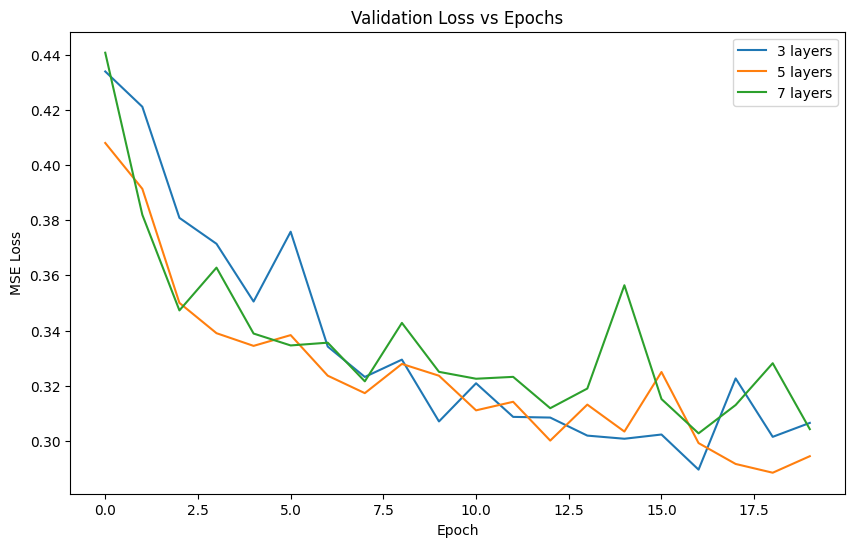

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# --------------------
# Load dataset
# --------------------
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------------------
# Build model function
# --------------------
def build_model(n_hidden_layers=3, hidden_units=64, lr=0.001):
    model = Sequential()
    model.add(Dense(hidden_units, activation="relu", input_shape=(X_train.shape[1],)))
    for _ in range(n_hidden_layers - 1):  # first layer already added
        model.add(Dense(hidden_units, activation="relu"))
    model.add(Dense(1))  # regression output
    model.compile(optimizer=Adam(learning_rate=lr), loss="mse")
    return model

# --------------------
# Train and evaluate
# --------------------
results = {}
for layers in [3, 5, 7]:
    print(f"\nTraining with {layers} hidden layers...")
    model = build_model(n_hidden_layers=layers, hidden_units=64)
    history = model.fit(X_train, y_train,
                        validation_split=0.1,
                        epochs=20, batch_size=32,
                        verbose=0)

    # Predictions
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[layers] = (mse, r2, history)
    print(f"Hidden Layers={layers} → MSE={mse:.4f}, R²={r2:.4f}")

# --------------------
# Plot validation loss
# --------------------
plt.figure(figsize=(10,6))
for layers, (mse, r2, history) in results.items():
    plt.plot(history.history['val_loss'], label=f"{layers} layers")
plt.title("Validation Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.num_layers = len(hidden_sizes) + 1

        # Initialize weights and biases
        self.weights = []
        self.biases = []
        sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(1, self.num_layers + 1):
            self.weights.append(np.random.randn(sizes[i], sizes[i-1]) * 0.01)
            self.biases.append(np.zeros((sizes[i], 1)))

    def forward(self, X):
        self.activations = [X]
        self.z = []
        for i in range(self.num_layers):
            z = np.dot(self.weights[i], self.activations[i]) + self.biases[i]
            self.z.append(z)
            if i < self.num_layers - 1:
                a = self.tanh(z)  # hidden layers
            else:
                a = self.softmax(z)  # output layer
            self.activations.append(a)
        return self.activations[-1]

    def backward(self, X, y):
        m = X.shape[1]
        gradients = []

        # derivative for cross-entropy with softmax
        dZ = self.activations[-1] - y  # shape: (output_size, m)

        for i in range(self.num_layers - 1, -1, -1):
            dW = (1 / m) * np.dot(dZ, self.activations[i].T)
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
            gradients.append((dW, db))

            if i > 0:
                dA = np.dot(self.weights[i].T, dZ)
                dZ = dA * self.gradient_tanh(self.z[i-1])

        return gradients[::-1]

    def update_parameters(self, gradients, learning_rate):
        for i in range(self.num_layers):
            self.weights[i] -= learning_rate * gradients[i][0]
            self.biases[i] -= learning_rate * gradients[i][1]

    def compute_loss(self, y_pred, y_true):
        m = y_true.shape[1]
        loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
        return loss

    def tanh(self, Z):
        return np.tanh(Z)

    def gradient_tanh(self, Z):
        return 1 - np.tanh(Z) ** 2

    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return expZ / np.sum(expZ, axis=0, keepdims=True)

if __name__ == "__main__":
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import OneHotEncoder

    # Generate synthetic classification dataset
    X, y = make_classification(n_samples=500, n_features=4, n_classes=3,
                               n_informative=3, n_redundant=0, random_state=42)

    # One-hot encode labels
    enc = OneHotEncoder(sparse_output=False)
    y_onehot = enc.fit_transform(y.reshape(-1, 1))

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_onehot, test_size=0.2, random_state=42
    )

    # Normalize inputs
    X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
    X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

    # Transpose for (features, samples)
    X_train, X_test = X_train.T, X_test.T
    y_train, y_test = y_train.T, y_test.T

    # Define model
    input_size = X_train.shape[0]
    hidden_sizes = [10, 10]
    output_size = y_train.shape[0]
    mlp = MLP(input_size, hidden_sizes, output_size)

    # Training
    num_epochs = 1000
    learning_rate = 0.1

    for epoch in range(num_epochs):
        outputs = mlp.forward(X_train)
        gradients = mlp.backward(X_train, y_train)
        mlp.update_parameters(gradients, learning_rate)

        loss = mlp.compute_loss(outputs, y_train)
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1} - Loss: {loss:.4f}")

    # Testing
    test_outputs = mlp.forward(X_test)
    predictions = np.argmax(test_outputs, axis=0)
    true_labels = np.argmax(y_test, axis=0)
    accuracy = np.mean(predictions == true_labels)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 100 - Loss: 1.0972
Epoch 200 - Loss: 1.0972
Epoch 300 - Loss: 1.0972
Epoch 400 - Loss: 1.0972
Epoch 500 - Loss: 1.0972
Epoch 600 - Loss: 1.0972
Epoch 700 - Loss: 1.0972
Epoch 800 - Loss: 1.0972
Epoch 900 - Loss: 1.0971
Epoch 1000 - Loss: 1.0970
Test Accuracy: 26.00%


### Assignment 2
Peform classification on MNIST Dataset and change number of hidden layers to 3, 5 and 7 for peformance comparision.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with 3 hidden layers...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 - 9s - 22ms/step - accuracy: 0.9070 - loss: 0.3198 - val_accuracy: 0.9675 - val_loss: 0.1195
Epoch 2/10
422/422 - 7s - 17ms/step - accuracy: 0.9646 - loss: 0.1191 - val_accuracy: 0.9723 - val_loss: 0.0953
Epoch 3/10
422/422 - 5s - 11ms/step - accuracy: 0.9755 - loss: 0.0801 - val_accuracy: 0.9745 - val_loss: 0.0839
Epoch 4/10
422/422 - 2s - 6ms/step - accuracy: 0.9815 - loss: 0.0595 - val_accuracy: 0.9748 - val_loss: 0.0833
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.9849 - loss: 0.0466 - val_accuracy: 0.9758 - val_loss: 0.0828
Epoch 6/10
422/422 - 3s - 7ms/step - accuracy: 0.9879 - loss: 0.0392 - val_accuracy: 0.9785 - val_loss: 0.0779
Epoch 7/10
422/422 - 5s - 11ms/step - accuracy: 0.9907 - loss: 0.0291 - val_accuracy: 0.9787 - val_loss: 0.0847
Epoch 8/10
422/422 - 2s - 5ms/step - accuracy: 0.9915 - loss: 0.0247 - val_accuracy: 0.9765 - val_loss: 0.0895
Epoch 9/10
422/422 - 3s - 6ms/step - accuracy: 0.9932 - loss: 0.0220 - val_accuracy: 0.9800 - val_loss: 0.07

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 - 5s - 11ms/step - accuracy: 0.9027 - loss: 0.3277 - val_accuracy: 0.9605 - val_loss: 0.1306
Epoch 2/10
422/422 - 6s - 14ms/step - accuracy: 0.9632 - loss: 0.1207 - val_accuracy: 0.9698 - val_loss: 0.1051
Epoch 3/10
422/422 - 3s - 7ms/step - accuracy: 0.9734 - loss: 0.0852 - val_accuracy: 0.9755 - val_loss: 0.0820
Epoch 4/10
422/422 - 5s - 12ms/step - accuracy: 0.9799 - loss: 0.0626 - val_accuracy: 0.9742 - val_loss: 0.0935
Epoch 5/10
422/422 - 3s - 7ms/step - accuracy: 0.9827 - loss: 0.0558 - val_accuracy: 0.9740 - val_loss: 0.0912
Epoch 6/10
422/422 - 6s - 14ms/step - accuracy: 0.9863 - loss: 0.0420 - val_accuracy: 0.9762 - val_loss: 0.0817
Epoch 7/10
422/422 - 4s - 10ms/step - accuracy: 0.9879 - loss: 0.0380 - val_accuracy: 0.9783 - val_loss: 0.0818
Epoch 8/10
422/422 - 4s - 9ms/step - accuracy: 0.9896 - loss: 0.0316 - val_accuracy: 0.9807 - val_loss: 0.0767
Epoch 9/10
422/422 - 3s - 7ms/step - accuracy: 0.9908 - loss: 0.0279 - val_accuracy: 0.9827 - val_loss: 0.0

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 - 7s - 16ms/step - accuracy: 0.8924 - loss: 0.3494 - val_accuracy: 0.9632 - val_loss: 0.1299
Epoch 2/10
422/422 - 3s - 8ms/step - accuracy: 0.9604 - loss: 0.1304 - val_accuracy: 0.9685 - val_loss: 0.1063
Epoch 3/10
422/422 - 3s - 8ms/step - accuracy: 0.9704 - loss: 0.0967 - val_accuracy: 0.9722 - val_loss: 0.0995
Epoch 4/10
422/422 - 4s - 9ms/step - accuracy: 0.9770 - loss: 0.0753 - val_accuracy: 0.9700 - val_loss: 0.1029
Epoch 5/10
422/422 - 4s - 9ms/step - accuracy: 0.9813 - loss: 0.0626 - val_accuracy: 0.9763 - val_loss: 0.0846
Epoch 6/10
422/422 - 5s - 11ms/step - accuracy: 0.9834 - loss: 0.0526 - val_accuracy: 0.9743 - val_loss: 0.0894
Epoch 7/10
422/422 - 6s - 15ms/step - accuracy: 0.9855 - loss: 0.0455 - val_accuracy: 0.9748 - val_loss: 0.0975
Epoch 8/10
422/422 - 3s - 8ms/step - accuracy: 0.9876 - loss: 0.0408 - val_accuracy: 0.9770 - val_loss: 0.0853
Epoch 9/10
422/422 - 5s - 12ms/step - accuracy: 0.9895 - loss: 0.0352 - val_accuracy: 0.9760 - val_loss: 0.09

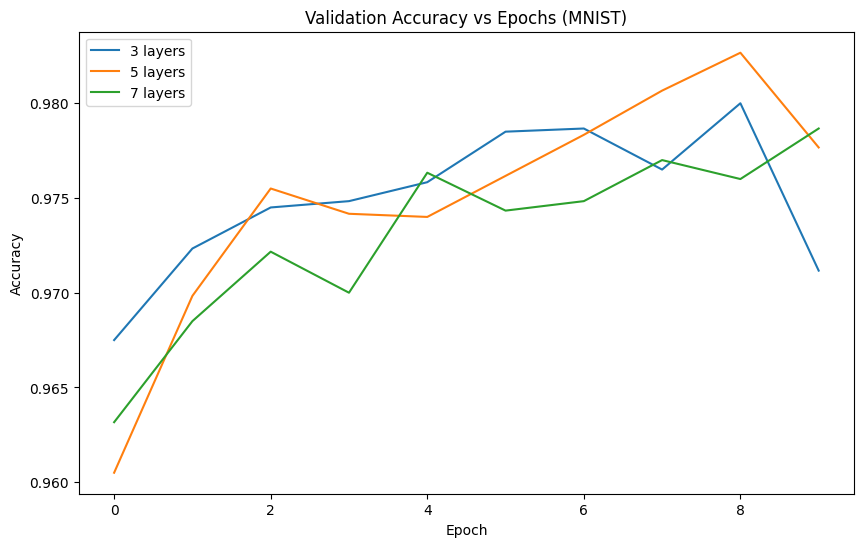

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# --------------------
# Load MNIST dataset
# --------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# --------------------
# Build model function
# --------------------
def build_model(n_hidden_layers=3, hidden_units=128, lr=0.001):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    # Add hidden layers
    for _ in range(n_hidden_layers):
        model.add(Dense(hidden_units, activation="relu"))
    # Output layer
    model.add(Dense(10, activation="softmax"))
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# --------------------
# Train and evaluate
# --------------------
results = {}
for layers in [3, 5, 7]:
    print(f"\nTraining with {layers} hidden layers...")
    model = build_model(n_hidden_layers=layers, hidden_units=128)
    history = model.fit(X_train, y_train_cat,
                        validation_split=0.1,
                        epochs=10, batch_size=128,
                        verbose=2)

    # Evaluate
    test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
    results[layers] = (test_loss, test_acc, history)
    print(f"Hidden Layers={layers} → Test Accuracy: {test_acc*100:.2f}%")

    # Optional: classification report
    y_pred = model.predict(X_test).argmax(axis=1)
    print(classification_report(y_test, y_pred))

# --------------------
# Plot validation accuracy
# --------------------
plt.figure(figsize=(10,6))
for layers, (_, _, history) in results.items():
    plt.plot(history.history['val_accuracy'], label=f"{layers} layers")
plt.title("Validation Accuracy vs Epochs (MNIST)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Test Accuracy: 70.00%


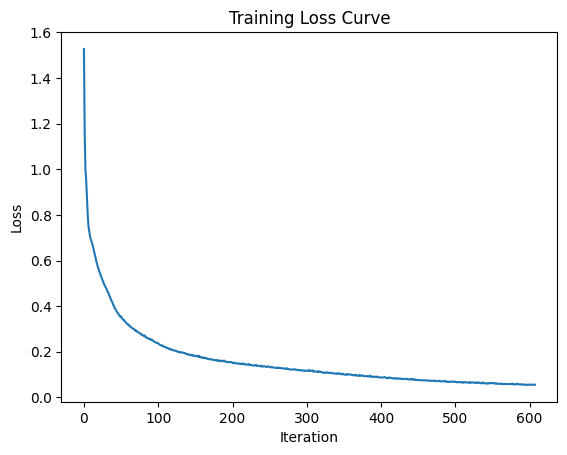

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y = make_classification(
    n_samples=500, n_features=4, n_classes=3,
    n_informative=3, n_redundant=0, random_state=42
)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 10),
    activation='tanh',
    solver='sgd',
    learning_rate_init=0.1,
    max_iter=1000,
    random_state=42
)

# Train
mlp.fit(X_train, y_train)

# Evaluate
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot loss curve
plt.plot(mlp.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()
